# Hackathon -2

# importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np

# Reading the data file

In [2]:
#reading csv file and displaying
df=pd.read_csv("data_hackathon-2.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# Level 0 analysis

# 1.Shape

In [3]:
df.shape

(100000, 24)

# 2.Null value counts

In [4]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# 3.Column names

In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

# 4. info of the data file

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

# 5.Seperating numerical and categorical data

In [7]:
# creating a user defined function for seperating numerical or categorical data
def seperate_data_types(df):
    categorical=[]
    numerical=[]
    for column in df.columns:
        if df[column].nunique()<100:
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical,numerical
categorical,numerical=seperate_data_types(df)

# using tabulate to print the data
from tabulate import tabulate
table =[categorical,numerical]
print(tabulate({"categorical":categorical,"numerical":numerical},headers =["categorical","numerical"]))

categorical          numerical
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


here data is not in correct list hence we will remove and append it in correct list

In [8]:
categorical.remove("TARGET")
numerical.append("TARGET")

categorical.remove("CNT_CHILDREN")
numerical.append("CNT_CHILDREN")

categorical.remove("MOBILE")
numerical.append("MOBILE")

categorical.remove("WORK_PHONE")
numerical.append("WORK_PHONE")

categorical.remove("HOME_PHONE")
numerical.append("HOME_PHONE")

categorical.remove("MOBILE_REACHABLE")
numerical.append("MOBILE_REACHABLE")

categorical.remove("FLAG_EMAIL")
numerical.append("FLAG_EMAIL")

categorical.remove("CNT_FAM_MEMBERS")
numerical.append("CNT_FAM_MEMBERS")

categorical.remove("TOTAL_DOC_SUBMITTED")
numerical.append("TOTAL_DOC_SUBMITTED")

In [9]:
categorical

['NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'APPLICATION_DAY']

In [10]:
numerical

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'TARGET',
 'CNT_CHILDREN',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'TOTAL_DOC_SUBMITTED']

In [11]:
df[df.duplicated(keep=False)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED


# Level 1 Analysis (Univariate analysis)

# 1.categorical data

In [12]:
# creating a user defined function  for calculating mode, null values and unique values
def info_of_cat(col):
    print(f"unique values in {col} are: {df[col].unique()}")
    print(f"mode of {col} is {df[col].mode()[0]}")
    print(f"number of missing values in {col} is {df[col].isnull().sum()}")
    if df[col].isnull().sum()>0:
        print(f"\n there are null values in the{col} columns")

In [13]:
info_of_cat("NAME_CONTRACT_TYPE")

unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
mode of NAME_CONTRACT_TYPE is Cash loans
number of missing values in NAME_CONTRACT_TYPE is 0


In [14]:
info_of_cat("GENDER")

unique values in GENDER are: ['M' 'F' 'XNA']
mode of GENDER is F
number of missing values in GENDER is 0


In [15]:
info_of_cat("Car")

unique values in Car are: ['N' 'Y']
mode of Car is N
number of missing values in Car is 0


In [16]:
info_of_cat("House")

unique values in House are: ['Y' 'N']
mode of House is Y
number of missing values in House is 0


In [17]:
info_of_cat("NAME_TYPE_SUITE")

unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
mode of NAME_TYPE_SUITE is Unaccompanied
number of missing values in NAME_TYPE_SUITE is 405

 there are null values in theNAME_TYPE_SUITE columns


In [18]:
info_of_cat("NAME_INCOME_TYPE")

unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
mode of NAME_INCOME_TYPE is Working
number of missing values in NAME_INCOME_TYPE is 0


In [19]:
info_of_cat("NAME_EDUCATION_TYPE")

unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
mode of NAME_EDUCATION_TYPE is Secondary / secondary special
number of missing values in NAME_EDUCATION_TYPE is 0


In [20]:
info_of_cat("NAME_FAMILY_STATUS")

unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
mode of NAME_FAMILY_STATUS is Married
number of missing values in NAME_FAMILY_STATUS is 0


In [21]:
info_of_cat("OCCUPATION_TYPE")

unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
mode of OCCUPATION_TYPE is Laborers
number of missing values in OCCUPATION_TYPE is 31224

 there are null values in theOCCUPATION_TYPE columns


In [22]:
info_of_cat("APPLICATION_DAY")

unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
mode of APPLICATION_DAY is TUESDAY
number of missing values in APPLICATION_DAY is 0


In [23]:
# creating a user defined function for numerical data
def info_of_numerical(col):
    print(f" the mean of {col} is {df[col].mean()}")
    print(f" the median of {col} is {df[col].median()}")
    print(f" the mode of {col} is {df[col].mode()}")
    print(f" the standard deviation of {col} is {df[col].std()}")
    print(f" the no of missing values for  {col} is {df[col].isnull().sum()}")

In [24]:
for i in numerical:
    print("\n The column is",i)
    info_of_numerical(i)
    


 The column is SK_ID_CURR
 the mean of SK_ID_CURR is 158006.14086
 the median of SK_ID_CURR is 157877.0
 the mode of SK_ID_CURR is 0        100002
1        100003
2        100004
3        100006
4        100007
          ...  
99995    216086
99996    216087
99997    216088
99998    216089
99999    216090
Length: 100000, dtype: int64
 the standard deviation of SK_ID_CURR is 33481.16699608501
 the no of missing values for  SK_ID_CURR is 0

 The column is AMT_INCOME_TOTAL
 the mean of AMT_INCOME_TOTAL is 169426.07027325002
 the median of AMT_INCOME_TOTAL is 144000.0
 the mode of AMT_INCOME_TOTAL is 0    135000.0
dtype: float64
 the standard deviation of AMT_INCOME_TOTAL is 383500.74427718896
 the no of missing values for  AMT_INCOME_TOTAL is 0

 The column is AMT_CREDIT
 the mean of AMT_CREDIT is 599003.4465
 the median of AMT_CREDIT is 513040.5
 the mode of AMT_CREDIT is 0    450000.0
dtype: float64
 the standard deviation of AMT_CREDIT is 402051.9591213264
 the no of missing values fo

# Checking outliers

In [25]:
sldf=pd.read_csv("data_hackathon-2.csv")
print("row and columns before removing outliers",sldf.shape)
print("wait till the shape after removing outliers is printed....")

def myoutlier(sldf,col):
    #print(len(newdf))
    Q3=np.quantile(sldf[col],0.75)
    Q1=np.quantile(sldf[col],0.25)
    
    IQR=Q3-Q1
    
    global my_list
    global my_outlier_df
    
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    
    print("the lower range of",col,"is",lower_range)
    print("the upper range of",col,"is",upper_range)
    
    my_list=[x for x in sldf[col] if((x<lower_range)|(x>upper_range))]     # list comprehension
    
    print("total outlier in ",col,"are",len(my_list))
    
    my_outlier_df=sldf.loc[sldf[col].isin(my_list)]
    
k=["DAYS_EMPLOYED","AMT_GOODS_PRICE","AMT_CREDIT","AMT_INCOME_TOTAL"]


for i in k:
    print("i is ",i)
    myoutlier(sldf,i)
    print("*****************************************************")

row and columns before removing outliers (100000, 24)
wait till the shape after removing outliers is printed....
i is  DAYS_EMPLOYED
the lower range of DAYS_EMPLOYED is -6458.5
the upper range of DAYS_EMPLOYED is 3409.5
total outlier in  DAYS_EMPLOYED are 23451
*****************************************************
i is  AMT_GOODS_PRICE
the lower range of AMT_GOODS_PRICE is nan
the upper range of AMT_GOODS_PRICE is nan
total outlier in  AMT_GOODS_PRICE are 0
*****************************************************
i is  AMT_CREDIT
the lower range of AMT_CREDIT is -537975.0
the upper range of AMT_CREDIT is 1616625.0
total outlier in  AMT_CREDIT are 2155
*****************************************************
i is  AMT_INCOME_TOTAL
the lower range of AMT_INCOME_TOTAL is -22500.0
the upper range of AMT_INCOME_TOTAL is 337500.0
total outlier in  AMT_INCOME_TOTAL are 4571
*****************************************************


In [26]:
df1=df
a=df[(df["AMT_CREDIT"]<-537975.0)|(df["AMT_CREDIT"]>1616625.0)]
df1=df1.drop(a.index,axis=0)

In [27]:
df1.shape

(97845, 24)

0    89.832
1     8.013
Name: TARGET, dtype: float64


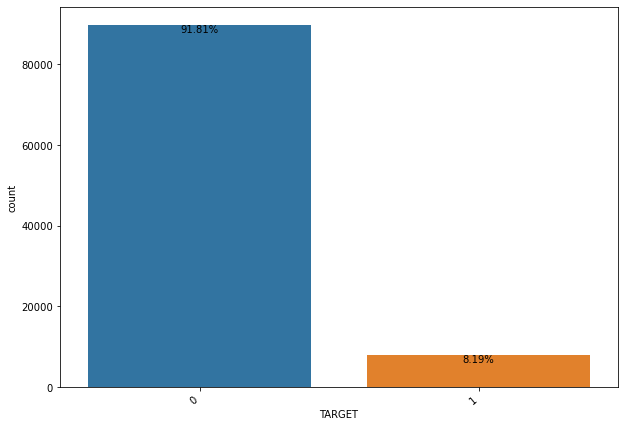

In [28]:
print((df1["TARGET"].value_counts()/len(df))*100)
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=df1["TARGET"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")

count=len(df1["TARGET"])
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/count)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha="center",va="top")
    
plt.show() 

around 9% or 9000 clients have payment difficulties

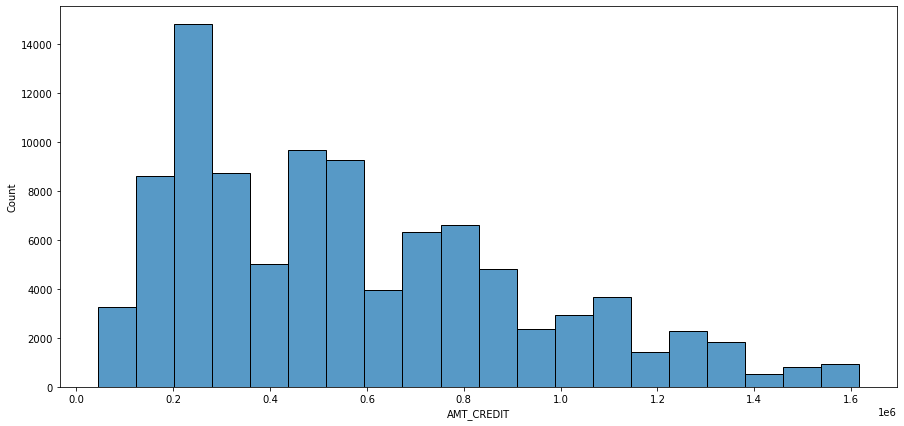

In [29]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["AMT_CREDIT"],ax=ax,bins=20)
plt.show()

Maximum no of people have the credit limit from 0.1 to 0.9,Howeverthere are around 12000 clients those with amt credit of 0.3

In [30]:
c=df1[(df1["DAYS_EMPLOYED"]<-6458.5)|(df1["DAYS_EMPLOYED"]>3409.5)]
df1=df1.drop(c.index,axis=0,errors="ignore")

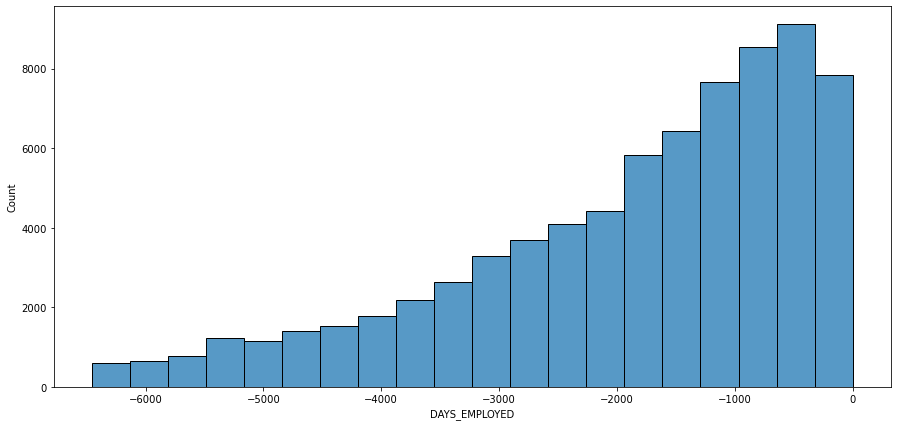

In [31]:
# distribution of area
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["DAYS_EMPLOYED"],ax=ax,bins=20)
plt.show()

maximum clients are employed  for Less than 2000 days(approx 5 years) while there are less than 2000 clients with 4000(approx 10 years) and more days of employement

In [32]:
b=df1[(df1["AMT_INCOME_TOTAL"]<-22500.0)|(df1["AMT_INCOME_TOTAL"]>337500.0)]
df1=df1.drop(b.index,axis=0,errors="ignore")

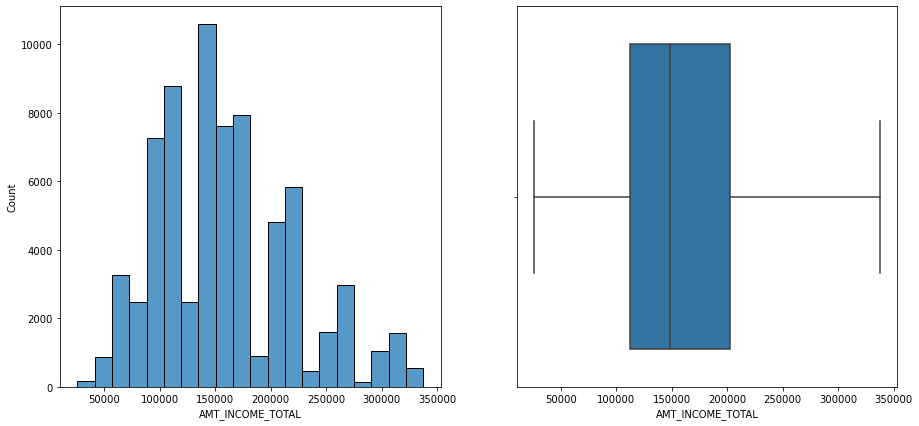

In [33]:

fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=df1["AMT_INCOME_TOTAL"],ax=ax[0],bins=20)
sns.boxplot(x=df1["AMT_INCOME_TOTAL"],ax=ax[1])
plt.show()

Maximum clients have income between 80,000 to 120000 and 140000 to 180000

Laborers                 16.107
Sales staff               9.895
Core staff                7.394
Drivers                   5.504
Managers                  4.901
High skill tech staff     3.020
Accountants               2.770
Medicine staff            2.214
Security staff            2.065
Cooking staff             1.793
Cleaning staff            1.411
Private service staff     0.767
Low-skill Laborers        0.684
Waiters/barmen staff      0.421
Secretaries               0.348
Realty agents             0.221
HR staff                  0.152
IT staff                  0.137
Name: OCCUPATION_TYPE, dtype: float64


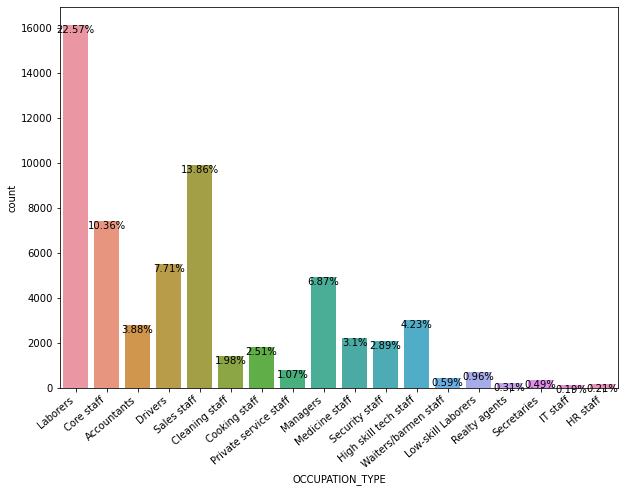

In [34]:

print((df1["OCCUPATION_TYPE"].value_counts()/len(df))*100)
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=df1["OCCUPATION_TYPE"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")

count=len(df1["OCCUPATION_TYPE"])
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/count)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha="center",va="top")
    
plt.show() 

Most clients are from Laborers group And second category for clients is from sales ,on the third core staff

Secondary / secondary special    50.285
Higher education                 17.571
Incomplete higher                 2.824
Lower secondary                   0.666
Academic degree                   0.033
Name: NAME_EDUCATION_TYPE, dtype: float64


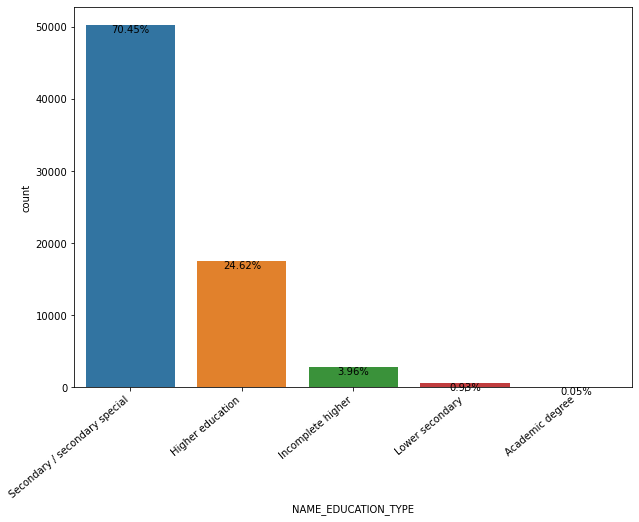

In [35]:
print((df1["NAME_EDUCATION_TYPE"].value_counts()/len(df))*100)
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=df1["NAME_EDUCATION_TYPE"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")

count=len(df1["NAME_EDUCATION_TYPE"])
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/count)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha="center",va="top")
    
plt.show() 

most of the clients have min of secondary education

Working                 46.337
Commercial associate    19.610
State servant            5.420
Student                  0.009
Pensioner                0.002
Businessman              0.001
Name: NAME_INCOME_TYPE, dtype: float64


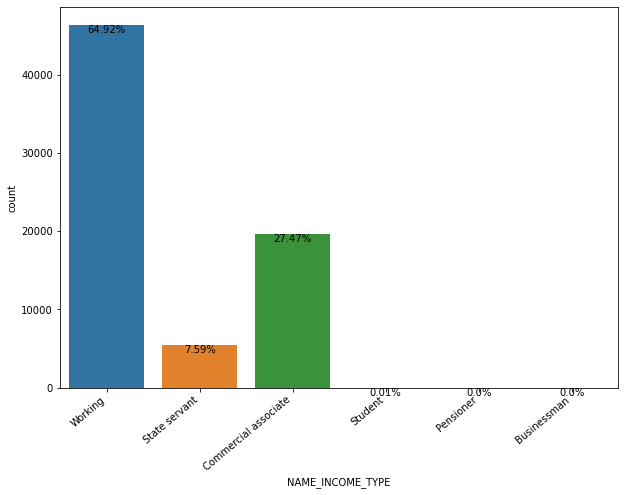

In [36]:
print((df1["NAME_INCOME_TYPE"].value_counts()/len(df))*100)
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=df1["NAME_INCOME_TYPE"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")

count=len(df1["NAME_INCOME_TYPE"])
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/count)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha="center",va="top")
    
plt.show() 

Most of the income type for clients  is working 

1    61.870
0     7.522
2     1.944
3     0.042
4     0.001
Name: TOTAL_DOC_SUBMITTED, dtype: float64


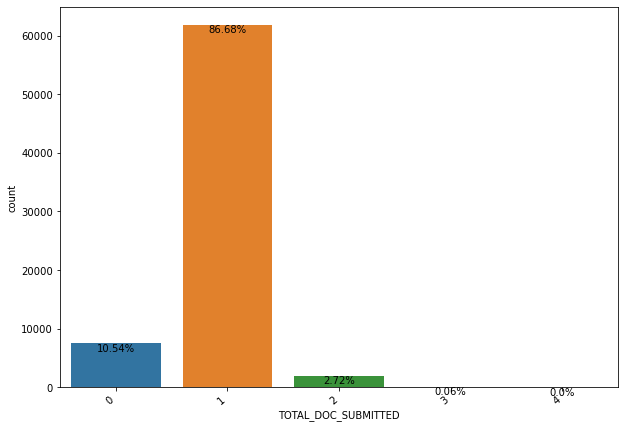

In [37]:
print((df1["TOTAL_DOC_SUBMITTED"].value_counts()/len(df))*100)
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=df1["TOTAL_DOC_SUBMITTED"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")

count=len(df1["TOTAL_DOC_SUBMITTED"])
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/count)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha="center",va="top")
    
plt.show() 

10.91% of the candidates have not submitted any of documents

# Level 2 analysis(Bivariate)

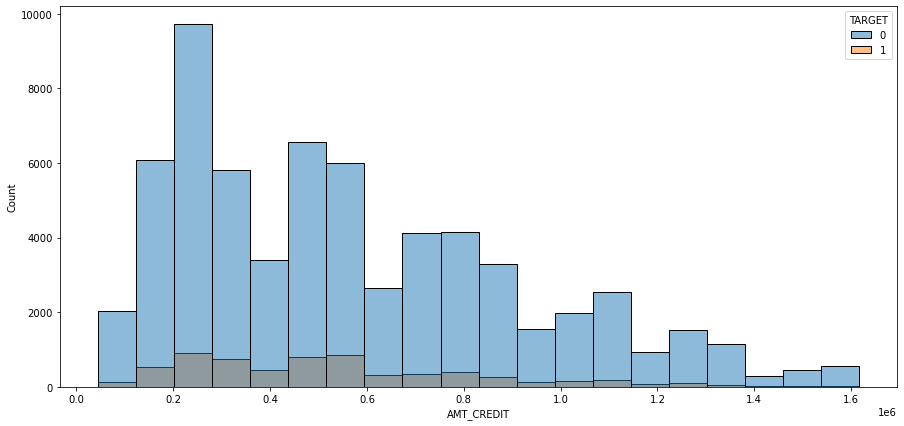

In [38]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["AMT_CREDIT"],hue=df1["TARGET"],ax=ax,bins=20)
plt.show()

by the graph,the highest no of clients with target 1 is for amt credit of 0.3 and have maximum no of clients with target 0 also.
the maximum clients are in the range 0.2 to 0.6  with target 0 and 1

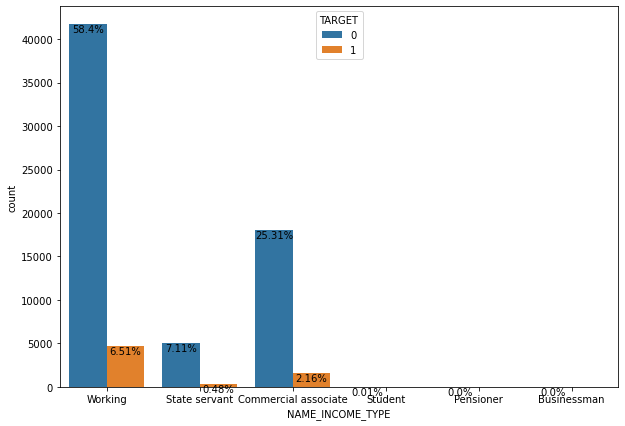

In [39]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x="NAME_INCOME_TYPE",hue="TARGET",data=df1)

count=len(df1["NAME_INCOME_TYPE"])
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/count)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha="center",va="top")
plt.show()

the differences for income type of targets 0 and 1 are----

Working=10.02%     state servent=6.32%      commercial associate=7.73%


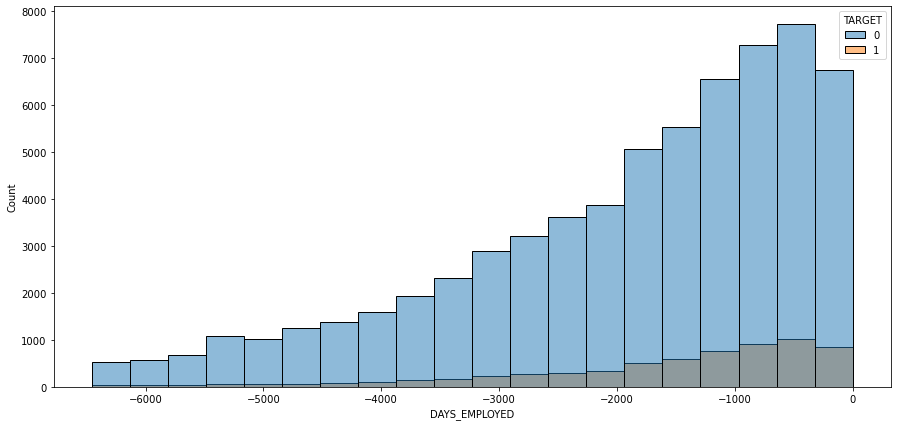

In [40]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["DAYS_EMPLOYED"],hue=df1["TARGET"],ax=ax,bins=20)
plt.show()

clients with less than 2000 days of working have highest ratio for target 1 (difficulties with the payment)

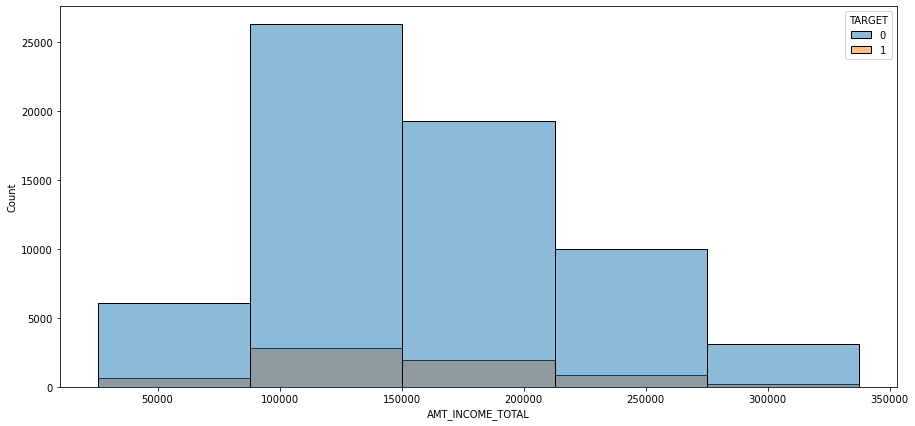

In [41]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["AMT_INCOME_TOTAL"],hue=df1["TARGET"],ax=ax,bins=5)
plt.show()

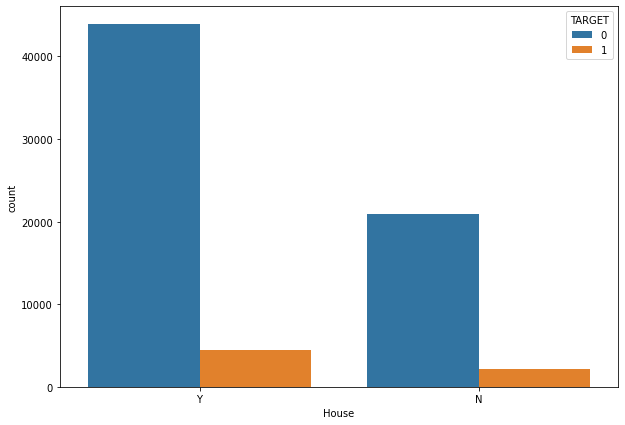

In [42]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x="House",hue="TARGET",data=df1)
plt.show()

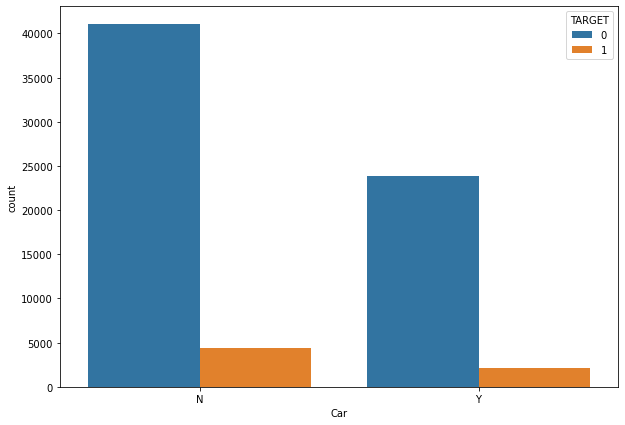

In [43]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x="Car",hue="TARGET",data=df1)
plt.show()

# Level 2 analysis (Multivariate Analysis)

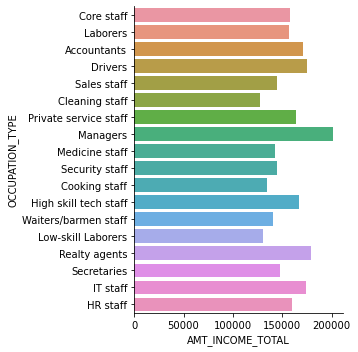

In [44]:
df1=df1.loc[(df1.TARGET==0)]
sns.catplot(y="OCCUPATION_TYPE",x="AMT_INCOME_TOTAL",data=df1,ci=None,kind='bar',)
plt.show()

AMT_INCOME_TOTAL>100000

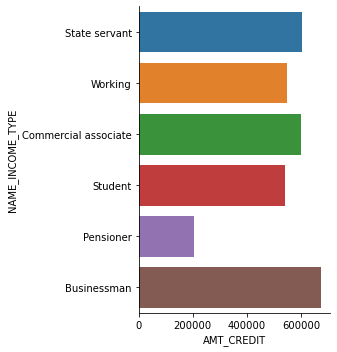

In [45]:
df1=df1.loc[(df1.TARGET==0)]
sns.catplot(x="AMT_CREDIT",y="NAME_INCOME_TYPE",data=df1,ci=None,kind='bar',)
plt.show()

amt_credit>200000

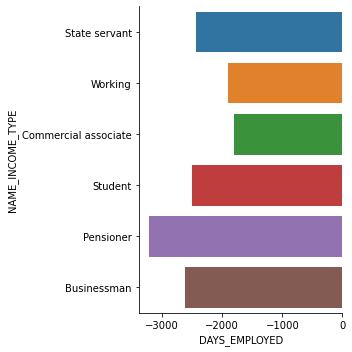

In [46]:
df1=df1.loc[(df1.TARGET==0)]
sns.catplot(x="DAYS_EMPLOYED",y="NAME_INCOME_TYPE",data=df1,ci=None,kind='bar',)
plt.show()

days<-2000 and occupation- working

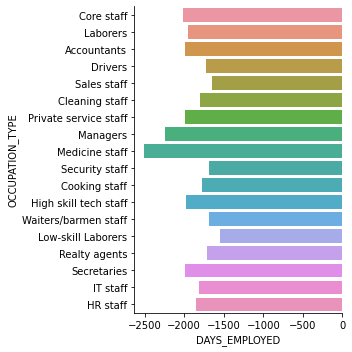

In [47]:
df1=df1.loc[(df1.TARGET==0)]
sns.catplot(x="DAYS_EMPLOYED",y="OCCUPATION_TYPE",data=df1,ci=None,kind='bar',)
plt.show()

In [48]:
d=df1[(df1["AMT_CREDIT"]>200000)&(df1["DAYS_EMPLOYED"]<-2000)&(df["NAME_INCOME_TYPE"]=="Working")&(df1["AMT_INCOME_TOTAL"]>150000)&(df1["TOTAL_DOC_SUBMITTED"]>=1)&(df["House"]=="Y")|(df["Car"]=="Y")]

C:\Users\Win-10\AppData\Local\Temp/ipykernel_8740/1699530880.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d=df1[(df1["AMT_CREDIT"]>200000)&(df1["DAYS_EMPLOYED"]<-2000)&(df["NAME_INCOME_TYPE"]=="Working")&(df1["AMT_INCOME_TOTAL"]>150000)&(df1["TOTAL_DOC_SUBMITTED"]>=1)&(df["House"]=="Y")|(df["Car"]=="Y")]


In [49]:
d

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,-3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,697500.0,...,-3028,1,1,0,1,0,Drivers,3.0,THURSDAY,1
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,-1157,1,1,0,1,0,Laborers,1.0,SATURDAY,1
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,427500.0,...,-4286,1,1,0,1,0,Laborers,2.0,FRIDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,216082,0,Cash loans,M,Y,N,2,270000.0,450000.0,450000.0,...,-5525,1,1,0,1,0,Managers,4.0,MONDAY,1
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,-135,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [50]:
d.to_csv("Approved clients")